<a href="https://colab.research.google.com/github/RicardoR002/NLP-CAI2300C/blob/main/Ecom_Sentiment_Analysis_RR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading the Dataset

This project examines customer reviews from a Women's Clothing E-Commerce dataset. It features nine supportive dimensions for comprehensive text analysis.

Ricardo Ruano CAI2300C

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('https://github.com/RicardoR002/Data/raw/refs/heads/main/Womens%20Clothing%20E-Commerce%20Reviews.csv')
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3085,3085,872,37,Adorable,Love this top the crossover design is so cute....,5,1,0,General,Tops,Knits
3042,3042,302,32,NaN,NaN,5,1,0,Initmates,Intimate,Swim
3984,3984,1094,36,Love it,Bought this dress in the blue and absolutely l...,5,1,0,General Petite,Dresses,Dresses
5245,5245,1035,57,Soft and retro,These flares are so soft and comfy they just m...,5,1,0,General,Bottoms,Jeans
11701,11701,825,44,NaN,NaN,5,1,0,General,Tops,Blouses


## 2. Data Cleaning and Preprocessing

In [ ]:
# Remove columns (no elevant info)
del df['Unnamed: 0']

# Review quanity?
print('There are', df.shape[0], 'reviews in this dataset')

# Check duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Check missing values?
print('Number of Missing Values:', df.isnull().sum().sum())

There are 23486 reviews in this dataset
Number of Duplicates: 21
Number of Missing Values: 4697


In [ ]:
# Number of Missing Values per column
print('Number of Missing Values per column:')
df.isnull().sum().sort_values(ascending=False)

Number of Missing Values per column:


,0
Title,3810
Review Text,845
Division Name,14
Department Name,14
Class Name,14
Clothing ID,0
Age,0
Rating,0
Recommended IND,0
Positive Feedback Count,0


In [ ]:
# Remove the rows with nulls of every column except the Title feature
df = df.dropna(subset = ['Review Text', 'Division Name', 'Department Name', 'Class Name'])

In [ ]:
# Verify Missing Values per column removed except Title
print('Number of Missing Values per column:')
df.isnull().sum().sort_values(ascending=False)

Number of Missing Values per column:


,0
Title,2966
Clothing ID,0
Age,0
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,0
Department Name,0
Class Name,0


In [ ]:
# Remove special characters, convert everything to lowercase, and tokenize the text.
# Text Cleaning and Tokenization
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    # Check if the input is a string to handle potential NaN or non-string values
    if isinstance(text, str):
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
        return text.lower().strip()
    else:
        # Return an empty string or a placeholder if not a string
        return ''  # Or you could return np.nan or some other placeholder

# Clean the Review Text
df['Review Text'] = df['Review Text'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Review Text'])
sequences = tokenizer.texts_to_sequences(df['Review Text'])
padded_sequences = pad_sequences(sequences, maxlen=200)

## 3. Split data into features and Target label (Recommended IND)

In [ ]:
# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['Recommended IND'].values

## 4. Splitting the Data into Training and Testing Sets

In [ ]:
# We’ll use an 80:20 split to separate the data into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Building the Neural Network with TensorFlow

In [ ]:
# We’ll create a simple neural network with an Embedding layer, followed by two LSTM layers, and a Dense output layer.
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


453/453 ━━━━━━━━━━━━━━━━━━━━ 92s 191ms/step - accuracy: 0.8273 - loss: 0.4314 - val_accuracy: 0.8793 - val_loss: 0.3303
Epoch 2/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 137s 180ms/step - accuracy: 0.9105 - loss: 0.2202 - val_accuracy: 0.8724 - val_loss: 0.2793
Epoch 3/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 85s 188ms/step - accuracy: 0.9293 - loss: 0.1734 - val_accuracy: 0.8807 - val_loss: 0.2754
Epoch 4/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 84s 185ms/step - accuracy: 0.9499 - loss: 0.1384 - val_accuracy: 0.8826 - val_loss: 0.3167
Epoch 5/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 141s 184ms/step - accuracy: 0.9575 - loss: 0.1167 - val_accuracy: 0.8854 - val_loss: 0.3837
Epoch 6/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 146s 193ms/step - accuracy: 0.9647 - loss: 0.0959 - val_accuracy: 0.8771 - val_loss: 0.3768
Epoch 7/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 140s 188ms/step - accuracy: 0.9717 - loss: 0.0832 - val_accuracy: 0.8738 - val_loss: 0.3900
Epoch 8/10
453/453 ━━━━━━━━━━━━━━━━━━━━ 143s 191ms/step - accuracy: 0.9804 - loss: 0.0607 

## 6. Visualizing Model Performance

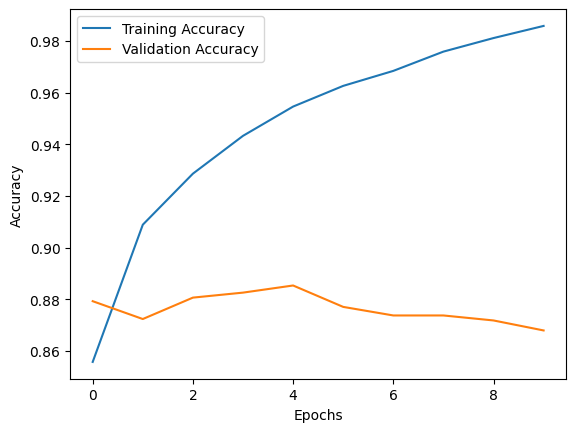

In [ ]:
# We can use Matplotlib to plot the training and validation accuracy over epochs.
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7. Evaluating the Model

In [ ]:
# Let’s evaluate our model on the test data to see how well it generalizes.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8640 - loss: 0.5523
Test Accuracy: 0.87


## 8. Making Predictions

In [ ]:
# We can use our model to predict the sentiment of new movie reviews.
sample_reviews = [
    "The fit was perfect, soft and comfortable fabrics for sports",
    "bad quality fabric, made my skin irritated"
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
['Positive', 'Negative']
